In [354]:
import numpy as np
import os
import matplotlib.pyplot as plt
import importlib
import math
import scipy

#Get some functions from external file
current_dir = os.getcwd()
os.chdir(r"C:\Users\sjefs\Desktop\AMAS\Functions")     # Direct to external module
import AMAS_functions as AMAS
importlib.reload(AMAS)
os.chdir(current_dir)
plt.style.use('ggplot')
import matplotlib.patheffects as pe

# Problem 1
## f(x) samples

In [7]:
# f samples
A_norm = 1.11 + 1/2*0.9*1.11**2 + 1/3*0.55*1.11**3 + 1.02 - 1/2*0.9*1.02**2 + 1/3*0.55*1.02**3
def f(x, a, b):
    return (1 + a*x + b*x**2)/A_norm
samples_f = AMAS.MC_sampler(f, interval = [-1.02, 1.11], n_points = 807, a = 0.9, b = 0.55)


# Poisson samples
def poisson(x, l):
    return np.exp(-l)*l**x/math.factorial(x)
samples_poisson = np.random.poisson(3.8, 513)

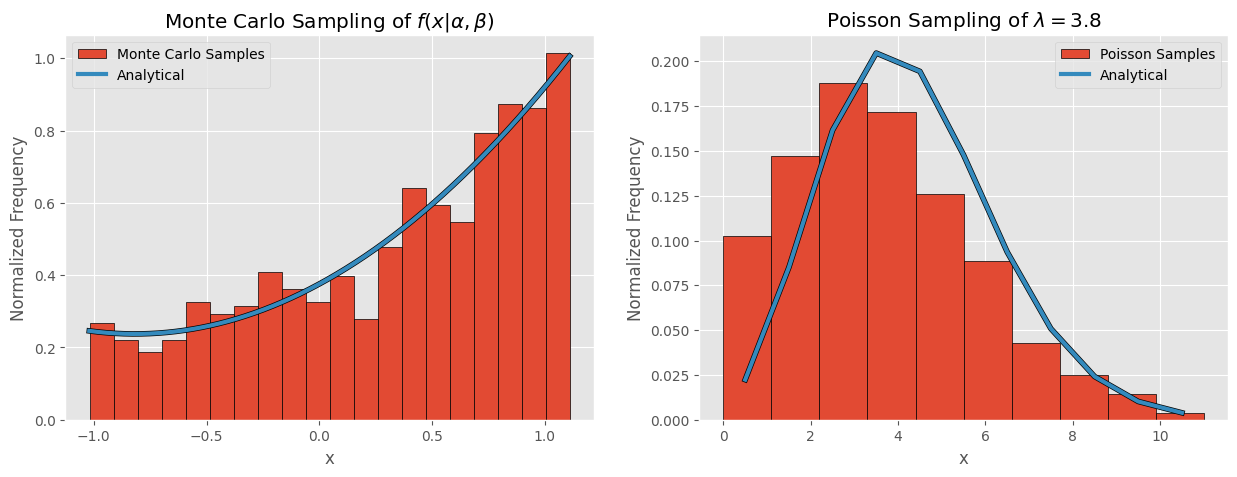

In [8]:
# PLotting
fig, ax = plt.subplots(1,2, figsize = (15,5))
ax[0].hist(samples_f, bins = 20, density=True, label = 'Monte Carlo Samples', edgecolor = 'black')
x_test = np.linspace(-1.02, 1.11, 1000)
y_test = f(x_test, 0.9, 0.55)
ax[0].plot(x_test, y_test, color = 'black', linewidth = 4)
ax[0].plot(x_test, y_test, label = 'Analytical', linewidth = 3)
ax[0].legend()
ax[0].set_xlabel('x')
ax[0].set_ylabel('Normalized Frequency')
ax[0].set_title(r'Monte Carlo Sampling of $f(x| \alpha, \beta)$')

ax[1].hist(samples_poisson, bins = 10, density=True, label = 'Poisson Samples', edgecolor = 'black')
x_test = np.linspace(0, 10, 11)
y_test = np.array([poisson(int(x), 3.8) for x in x_test])
ax[1].plot(x_test + 0.5, y_test, color = 'black', linewidth = 4)
ax[1].plot(x_test + 0.5, y_test, label = 'Analytical', linewidth = 3)
ax[1].legend()
ax[1].set_xlabel('x')
ax[1].set_ylabel('Normalized Frequency')
ax[1].set_title(r'Poisson Sampling of $\lambda = 3.8$')
plt.savefig('MC_sampling.png')
plt.show()

## MLH estimator
### MLH for f(x)

We have log likelihood:
$\begin{equation}
L(x, a,a b) = -ln(f(x_1, a, b)) - ln(f(x_2, a, b)) - ... 
\end{equation}$
and function:
$\begin{equation}
f(x_i, a, b) = 1 + ax + bx^2
\end{equation}$
with the derivatives:
$\begin{equation}
\frac{\partial}{\partial a} ln(f(x_i, a, b)) = \frac{1}{f(x_i, a, b)} \frac{\partial}{\partial a} f(x_i, a, b) = \frac{x_i}{1 + ax_i + bx_i^2}
\end{equation}$
$\begin{equation}
\frac{\partial}{\partial a} ln(f(x_i, a, b)) = \frac{x_i^2}{1 + ax_i + bx_i^2}
\end{equation}$

so the gradient becomes:
$\begin{equation}
\frac{\partial}{\partial a} L(x, a, b) = \sum_i \frac{x_i}{1 + ax_i + bx_i^2}
\end{equation}$
$\begin{equation}
\frac{\partial}{\partial b} L(x, a, b) = \sum_i \frac{x_i^2}{1 + ax_i + bx_i^2}
\end{equation}$

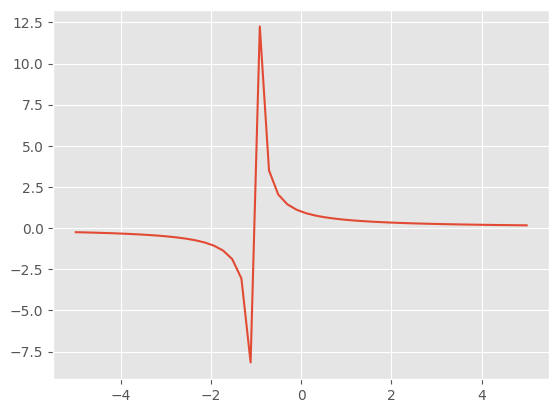

In [31]:
X = np.linspace(-5, 5)
Y = 1/(1+X)
plt.plot(X, Y)

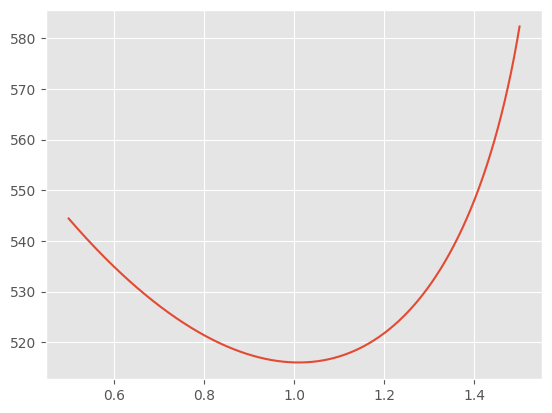

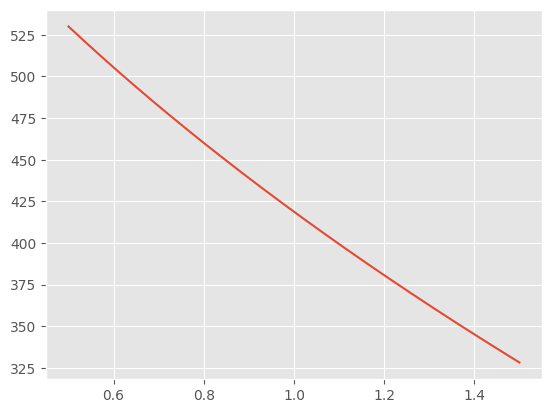

In [ ]:
# Attempt 2

def f(x, a, b):
    return (1 + a*x + b*x**2)/A_norm

def L(x, a, b):
    return -np.sum(np.log(f(x, a, b)))

def L_grad(x, a, b):
    return np.array([-np.sum(x*(1 + a*x + b*x**2)/A_norm), -np.sum(x**2*(1 + a*x + b*x**2)/A_norm)])

b = 0.55
a_test = np.linspace(0.5, 1.5, 1000)
grad_test = np.array([L_grad(samples_f, a, b) for a in a_test])
L_test = np.array([L(samples_f, a, b) for a in a_test])
plt.plot(a_test, L_test)
plt.show()

a = 0.9
b_test = np.linspace(0.5, 1.5, 1000)
grad_test = np.array([L_grad(samples_f, a, b) for b in b_test])
L_test = np.array([L(samples_f, a, b) for b in b_test])
plt.plot(b_test, L_test)
plt.show()


Best a: 1.0166558399051385e+43
Best b: 3.3377429438922733e+43


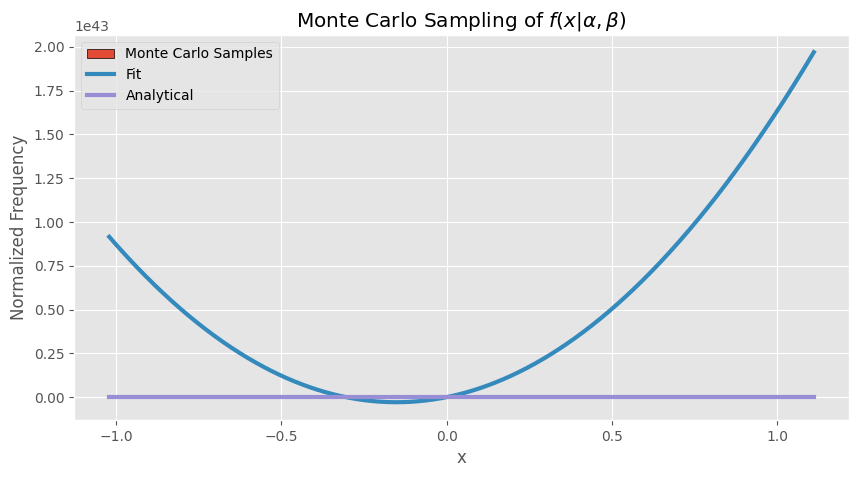

In [266]:
def neg_ln_likelihood(params, x):
    a, b = params
    part_1 = 1 + a*x + b*x**2
    for i in range(len(part_1)):
        if part_1[i] <= 0:
            part_1[i] = 1e10
    part_2 = np.log(part_1)
    part_3 = -np.sum(part_2)
    return part_3

def tester(a, b):
    return (1 - 1.02*a + 1.02**2*b)/A_norm

bounds = [(0, None), (0, None)]
m = scipy.optimize.minimize(neg_ln_likelihood, [0.9, 0.55], args = samples_f, method = 'Nelder-Mead', bounds = bounds)
best_a, best_b = m.x

print('Best a:', best_a)
print('Best b:', best_b)
x_test = np.linspace(-1.02, 1.11, 1000)
y_test = f(x_test, best_a, best_b)
y_test_2 = f(x_test, 0.9, 0.55)
fig, ax = plt.subplots(1,1, figsize = (10,5))
ax.hist(samples_f, bins = 20, density=True, label = 'Monte Carlo Samples', edgecolor = 'black')
ax.plot(x_test, y_test, label = 'Fit', linewidth = 3)
ax.plot(x_test, y_test_2, label = 'Analytical', linewidth = 3)
ax.legend()
ax.set_xlabel('x')
ax.set_ylabel('Normalized Frequency')
ax.set_title(r'Monte Carlo Sampling of $f(x| \alpha, \beta)$')
plt.savefig('MC_sampling_fit.png')
plt.show()



# Problem 2
idea:

* We seperate the datapoints into an upper and lower boundary. so we have two datasets. The top corners are located in each dataset. 
* We create splines between the datapoints in both sets, extracting two functions upper and lower: $f_{u}(x)$, $f_{l}(x)$ 
* We create a random point $(x_r, y_r)$. For this point we calculate $y_u = f_u(x_r)$ and $y_l = f_l(x_r)$. 
* We keep the point if $y_l \leq y_r \leq y_u$

In [214]:
lin_area_est = []
quad_area_est = []

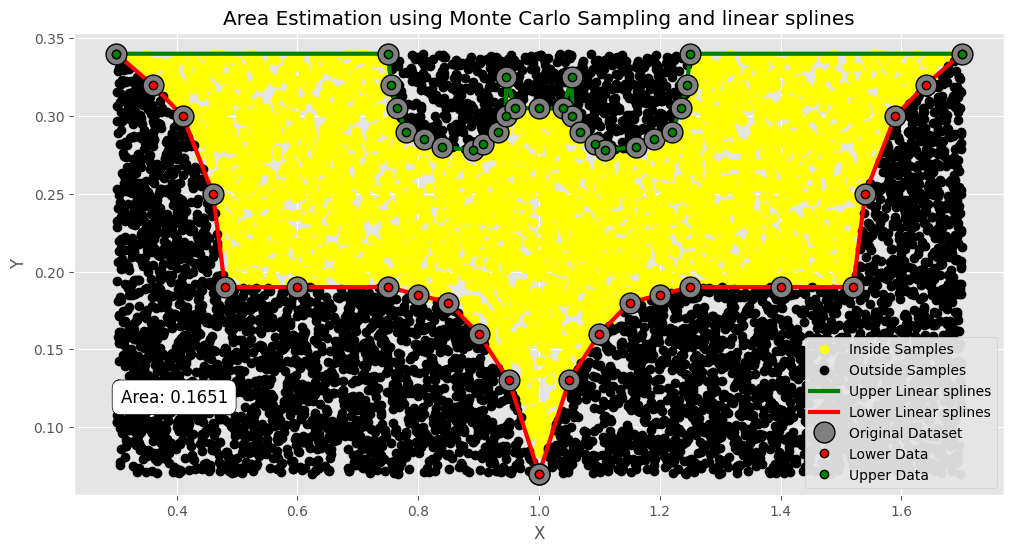

In [348]:
data_x, data_y = np.loadtxt("OutlineAreaSpline.txt").T
confine_x = (min(data_x), max(data_x))
confine_y = (min(data_y), max(data_y))

# We seperate the data into a lower and upper part
upper_data = []
lower_data = []
for i in range(len(data_x)):
    if data_x[i] < 0.4 and data_y[i] > 0.33:
        upper_data.append([data_x[i], data_y[i]])

    if data_x[i] > 1.6 and data_y[i] > 0.33:
        upper_data.append([data_x[i], data_y[i]])

    if data_x[i] < 0.7 or data_x[i] > 1.3:
        lower_data.append([data_x[i], data_y[i]])
        continue

    if data_y[i] > 0.25:
        upper_data.append([data_x[i], data_y[i]])
    else:
        lower_data.append([data_x[i], data_y[i]])

upper_data = np.array(upper_data).T
lower_data = np.array(lower_data).T



# Create spline functions
upper_func_lin = AMAS.spliner(upper_data[0], upper_data[1], kind = 'linear', return_function = True)
lower_func_lin = AMAS.spliner(lower_data[0], lower_data[1], kind = 'linear', return_function = True)

# Plot the spline functions
x_test = np.linspace(min(data_x), max(data_x), 1000)
upper_y_test = upper_func_lin(x_test)
lower_y_test = lower_func_lin(x_test)


# Generate samples
#outside_samples = []
#inside_samples = []

N = 10000
random_x = np.random.uniform(confine_x[0], confine_x[1], N)
random_y = np.random.uniform(confine_y[0], confine_y[1], N)
upper_y = upper_func_lin(random_x)
lower_y = lower_func_lin(random_x)
inside_samples = np.array([random_x[(upper_y > random_y) & (random_y > lower_y)], random_y[(upper_y > random_y) & (random_y > lower_y)]])
outside_samples = np.array([random_x[(upper_y < random_y) | (random_y < lower_y)], random_y[(upper_y < random_y) | (random_y < lower_y)]])

total_area = (confine_x[1] - confine_x[0])*(confine_y[1] - confine_y[0])
ratio = len(inside_samples.T)/N
area = total_area*ratio
lin_area_est.append(area)

# Plotting
plt.figure(figsize = (12, 6))
plt.title('Area Estimation using Monte Carlo Sampling and linear splines')
plt.xlabel('X')
plt.ylabel('Y')
# Annotate the ratio and the area on the plot
plt.annotate(f'Area: {area:.4f}', xy=(0.05, 0.2), xycoords='axes fraction', fontsize=12, color='black', 
             bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))




plt.plot(inside_samples[0], inside_samples[1], 'o', label = 'Inside Samples', color = 'yellow')
plt.plot(outside_samples[0], outside_samples[1], 'o', label = 'Outside Samples', color = 'black')
plt.plot(x_test, upper_y_test, label = 'Upper Linear splines', color = 'green', linewidth = 3)
plt.plot(x_test, lower_y_test, label = 'Lower Linear splines', color = 'red', linewidth = 3)

plt.plot(data_x, data_y, 'o', label = 'Original Dataset', markersize = 15, color = "gray", markeredgecolor = 'black')

plt.plot(lower_data[0], lower_data[1], 'o', color = "red", label = 'Lower Data', markeredgecolor = 'black')
plt.plot(upper_data[0], upper_data[1], 'o', color = "green", label = 'Upper Data', markeredgecolor = 'black')
plt.legend(framealpha=0.95, loc = 'lower right')
plt.savefig('MC_area_estimation_linear.png')

In [352]:
from scipy.stats import norm
from scipy.optimize import curve_fit

lin_area_est = []
quad_area_est = []

for x in range(5000):
    N = 10000
    random_x = np.random.uniform(confine_x[0], confine_x[1], N)
    random_y = np.random.uniform(confine_y[0], confine_y[1], N)
    upper_y = upper_func_lin(random_x)
    lower_y = lower_func_lin(random_x)
    inside_samples = np.array([random_x[(upper_y > random_y) & (random_y > lower_y)], random_y[(upper_y > random_y) & (random_y > lower_y)]])
    outside_samples = np.array([random_x[(upper_y < random_y) | (random_y < lower_y)], random_y[(upper_y < random_y) | (random_y < lower_y)]])

    
    total_area = (confine_x[1] - confine_x[0])*(confine_y[1] - confine_y[0])
    ratio = len(inside_samples.T)/N
    area = total_area*ratio
    lin_area_est.append(area)


<>:31: SyntaxWarning: invalid escape sequence '\p'
<>:31: SyntaxWarning: invalid escape sequence '\p'
C:\Users\sjefs\AppData\Local\Temp\ipykernel_19448\1231227803.py:31: SyntaxWarning: invalid escape sequence '\p'
  plt.annotate(f'Mean Area: {mean:.4f} $\pm$ {std:.4f}', xy=(0.05, 0.45), xycoords='axes fraction', fontsize=12, color='black',


Chi-square: 14.928331996681397
P-value: 0.9791816046513807
Fitted mean: 0.16391211461682922
Fitted standard deviation: 0.0019150219907554907


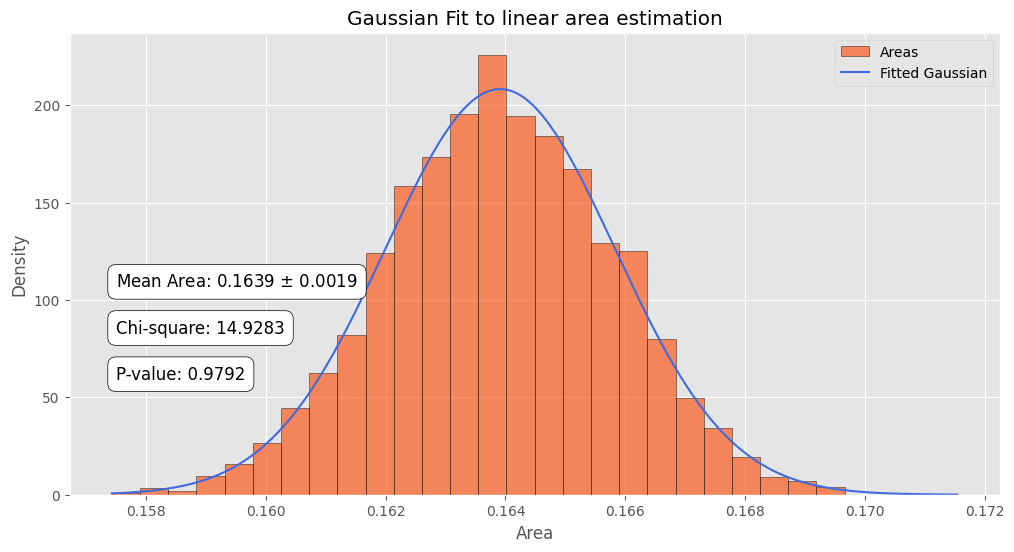

In [368]:
    
# Fit the lin_area_est data with a Gaussian using a chi-square fit
mean, std = norm.fit(lin_area_est)

# Create a histogram of the data
hist, bin_edges = np.histogram(lin_area_est, bins=30, density=True)

# Calculate the bin centers
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# Define the Gaussian function
def gaussian(x, mean, std):
    return (1/(std * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mean) / std)**2)

# Perform the chi-square fit
popt, pcov = curve_fit(gaussian, bin_centers, hist, p0=[mean, std])
# Calculate the chi-square value and p-value
observed = hist
expected = gaussian(bin_centers, *popt)
chi_square = np.sum((observed - expected)**2 / expected)
p_value = 1 - scipy.stats.chi2.cdf(chi_square, df=len(bin_centers) - 2)

plt.figure(figsize=(12, 6))
print(f"Chi-square: {chi_square}")
print(f"P-value: {p_value}")
# Annotate the chi-square and p-value on the plot
plt.annotate(f'Chi-square: {chi_square:.4f}', xy=(0.05, 0.35), xycoords='axes fraction', fontsize=12, color='black', 
             bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))

plt.annotate(f'P-value: {p_value:.4f}', xy=(0.05, 0.25), xycoords='axes fraction', fontsize=12, color='black', 
             bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))
plt.annotate(f'Mean Area: {mean:.4f} $\pm$ {std:.4f}', xy=(0.05, 0.45), xycoords='axes fraction', fontsize=12, color='black', 
             bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))
# Plot the histogram and the fitted Gaussian
plt.hist(lin_area_est, bins=30, density=True, alpha=0.6, color = "orangered", label='Areas', edgecolor='black')
x = np.linspace(min(lin_area_est), max(lin_area_est), 1000)
plt.plot(x, gaussian(x, *popt), color = "royalblue", label='Fitted Gaussian')
plt.xlabel('Area')
plt.ylabel('Density')
plt.title('Gaussian Fit to linear area estimation')
plt.legend()
plt.savefig('Gaussian_fit_linear.png')

print(f"Fitted mean: {popt[0]}")
print(f"Fitted standard deviation: {popt[1]}")

<>:31: SyntaxWarning: invalid escape sequence '\p'
<>:31: SyntaxWarning: invalid escape sequence '\p'
C:\Users\sjefs\AppData\Local\Temp\ipykernel_19448\1815778759.py:31: SyntaxWarning: invalid escape sequence '\p'
  plt.annotate(f'Mean Area: {mean:.4f} $\pm$ {std:.4f}', xy=(0.05, 0.45), xycoords='axes fraction', fontsize=12, color='black',


Chi-square: 16.903146624386398
P-value: 0.9504775803297072
Fitted mean: 0.16388709813846092
Fitted standard deviation: 0.001952398115096408


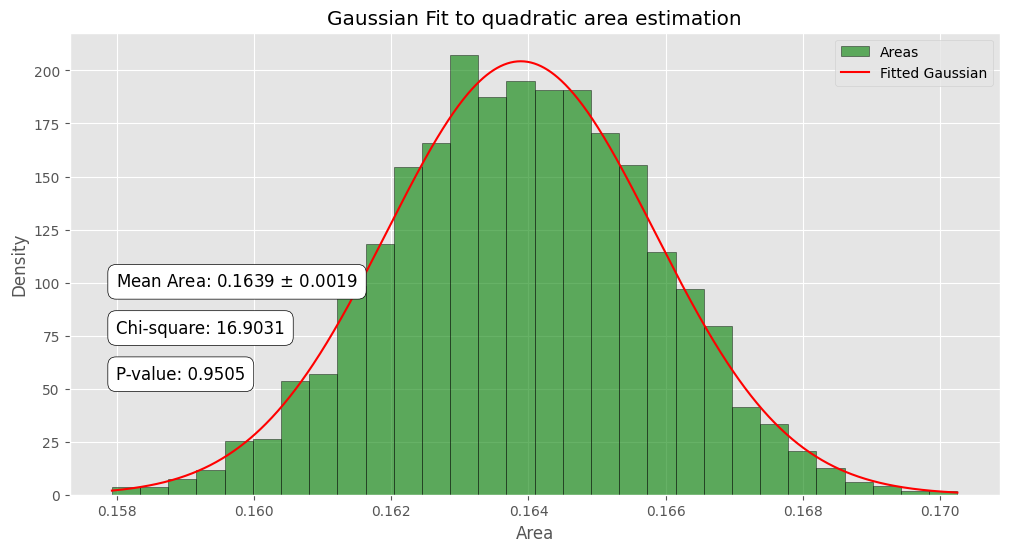

In [345]:
    
# Fit the lin_area_est data with a Gaussian using a chi-square fit
mean, std = norm.fit(quad_area_est)

# Create a histogram of the data
hist, bin_edges = np.histogram(quad_area_est, bins=30, density=True)

# Calculate the bin centers
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# Define the Gaussian function
def gaussian(x, mean, std):
    return (1/(std * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mean) / std)**2)

# Perform the chi-square fit
popt, pcov = curve_fit(gaussian, bin_centers, hist, p0=[mean, std])
# Calculate the chi-square value and p-value
observed = hist
expected = gaussian(bin_centers, *popt)
chi_square = np.sum((observed - expected)**2 / expected)
p_value = 1 - scipy.stats.chi2.cdf(chi_square, df=len(bin_centers) - 2)

plt.figure(figsize=(12, 6))
print(f"Chi-square: {chi_square}")
print(f"P-value: {p_value}")
# Annotate the chi-square and p-value on the plot
plt.annotate(f'Chi-square: {chi_square:.4f}', xy=(0.05, 0.35), xycoords='axes fraction', fontsize=12, color='black', 
             bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))

plt.annotate(f'P-value: {p_value:.4f}', xy=(0.05, 0.25), xycoords='axes fraction', fontsize=12, color='black', 
             bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))
plt.annotate(f'Mean Area: {mean:.4f} $\pm$ {std:.4f}', xy=(0.05, 0.45), xycoords='axes fraction', fontsize=12, color='black', 
             bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))
# Plot the histogram and the fitted Gaussian
plt.hist(quad_area_est, bins=30, density=True, alpha=0.6, color='g', label='Areas', edgecolor='black')
x = np.linspace(min(quad_area_est), max(quad_area_est), 1000)
plt.plot(x, gaussian(x, *popt), 'r-', label='Fitted Gaussian')
plt.xlabel('Area')
plt.ylabel('Density')
plt.title('Gaussian Fit to quadratic area estimation')
plt.legend()
plt.savefig('Gaussian_fit_quadratic.png')

print(f"Fitted mean: {popt[0]}")
print(f"Fitted standard deviation: {popt[1]}")

# Problem 3